# Task1: Prediction Using Unsupervised ML
## Dataset: [iris_dataset](https://bit.ly/3kXTdox)
## Context: 
### Using an unsupervised learning algorithm know as K-means to find the optimum number of clusters by grouping data points based on their attributes into clusters thereby,predicting the class species and visuallizing it using a data visualization library called matplotlib. 

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt,patches
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_iris=pd.read_csv("Iris.csv")

In [3]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [8]:
df_iris["SepalLengthCm"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [9]:
df_iris["SepalWidthCm"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [10]:
df_iris["PetalWidthCm"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [11]:
df_iris["PetalLengthCm"].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [12]:
df1=df_iris[df_iris["Species"]=="Iris-setosa"]
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df1.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,46,4.8,3.0,1.4,0.3,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [14]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [15]:
df2=df_iris[df_iris["Species"]=="Iris-versicolor"]
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [16]:
df2.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [17]:
df2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [18]:
df3=df_iris[df_iris["Species"]=="Iris-virginica"]
df3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [19]:
df3.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
df3.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


## Visualizing it on boxplot 

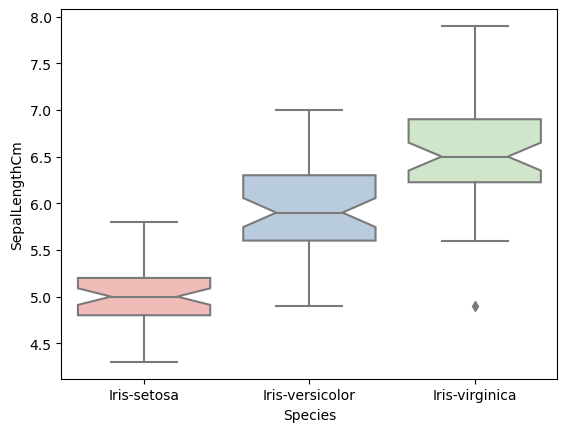

In [21]:
boxplot1=sns.boxplot(x="Species",y="SepalLengthCm",data=df_iris,palette="Pastel1",notch=True)

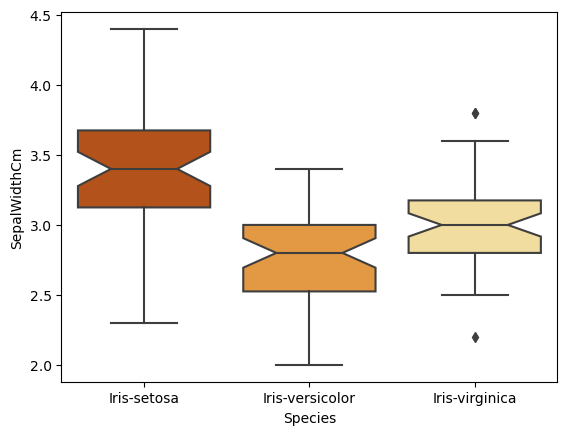

In [22]:
boxplot2=sns.boxplot(x="Species",y="SepalWidthCm",data=df_iris,palette="YlOrBr_r",notch=True)

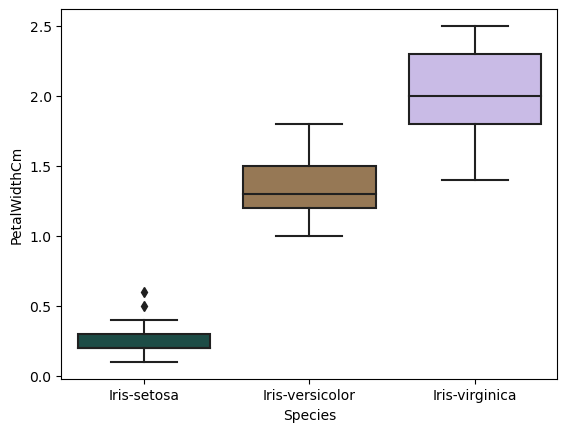

In [23]:
boxplot3=sns.boxplot(x="Species",y="PetalWidthCm",data=df_iris,palette="cubehelix")

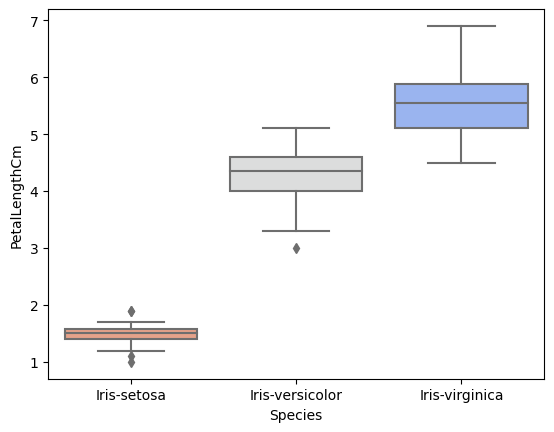

In [24]:
boxplot4=sns.boxplot(x="Species",y="PetalLengthCm",data=df_iris,palette="coolwarm_r")

### Shown below are the data points plotted on scatter plot.
### Simple use of scatter plot

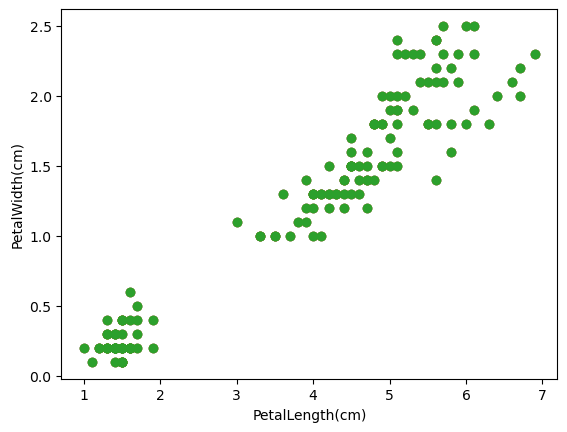

In [25]:
plt.scatter(x=df_iris["PetalLengthCm"],y=df_iris["PetalWidthCm"])
plt.scatter(x=df_iris["PetalLengthCm"],y=df_iris["PetalWidthCm"])
plt.scatter(x=df_iris["PetalLengthCm"],y=df_iris["PetalWidthCm"])
plt.xlabel("PetalLength(cm)")
plt.ylabel("PetalWidth(cm)")
plt.show()

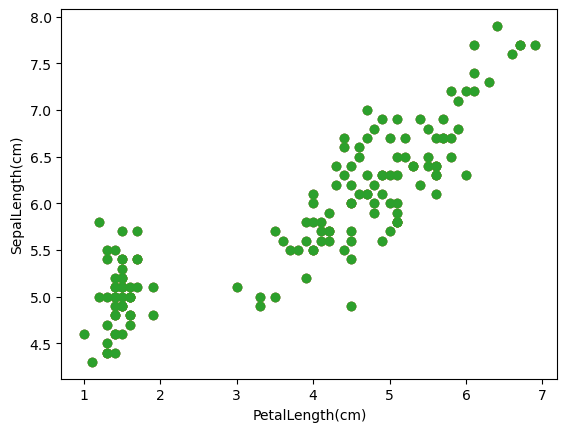

In [26]:
plt.scatter(x=df_iris["PetalLengthCm"],y=df_iris["SepalLengthCm"])
plt.scatter(x=df_iris["PetalLengthCm"],y=df_iris["SepalLengthCm"])
plt.scatter(x=df_iris["PetalLengthCm"],y=df_iris["SepalLengthCm"])
plt.xlabel("PetalLength(cm)")
plt.ylabel("SepalLength(cm)")
plt.show()

### Manually plotting data points on the scatter plot for later comparison(Manual Grouping)

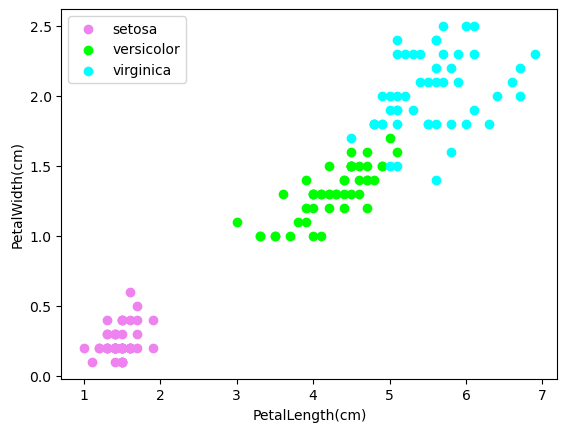

In [37]:
plt.scatter(x=df1["PetalLengthCm"],y=df1["PetalWidthCm"],c="violet",label="setosa")
plt.scatter(x=df2["PetalLengthCm"],y=df2["PetalWidthCm"],c="lime",label="versicolor")
plt.scatter(x=df3["PetalLengthCm"],y=df3["PetalWidthCm"],c="aqua",label="virginica")
plt.xlabel("PetalLength(cm)")
plt.ylabel("PetalWidth(cm)")
plt.legend()
plt.show()

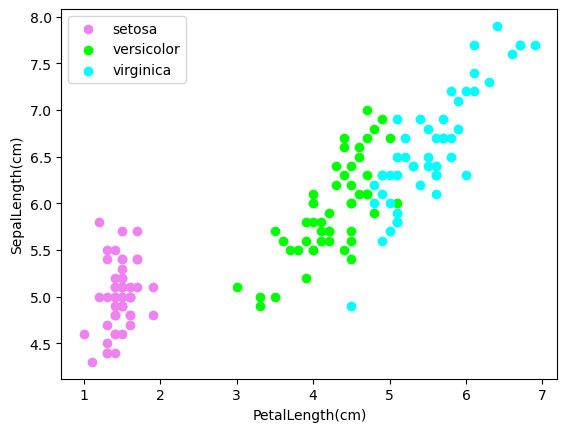

In [38]:
plt.scatter(x=df1["PetalLengthCm"],y=df1["SepalLengthCm"],c="violet",label="setosa")
plt.scatter(x=df2["PetalLengthCm"],y=df2["SepalLengthCm"],c="lime",label="versicolor")
plt.scatter(x=df3["PetalLengthCm"],y=df3["SepalLengthCm"],c="aqua",label="virginica")
plt.xlabel("PetalLength(cm)")
plt.ylabel("SepalLength(cm)")
plt.legend()
plt.show()

## Using K-Means algorithm to predict Species class

### considered their petals length and width

In [39]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_predict(df_iris[["PetalLengthCm","PetalWidthCm"]])
    sse.append(km.inertia_)
sse

[550.6434666666667,
 86.40394533571003,
 31.387758974358974,
 19.499400899685114,
 13.933308757908758,
 11.052733877751727,
 9.210266732047511,
 7.744856542037107,
 6.472894541406307]

### Used an Elbow Technique to find the optimum number of clusters

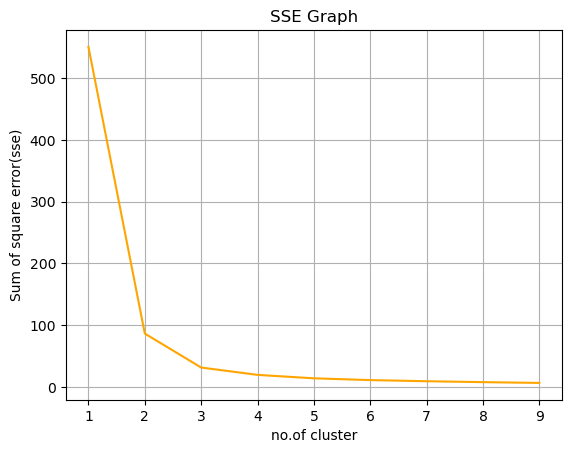

In [40]:
plt.title("SSE Graph")
plt.xlabel("no.of cluster")
plt.ylabel("Sum of square error(sse)")
plt.plot(k_range,sse,"orange")
plt.grid()

### Applying elbow technique on above chart we get the optimum number of cluster as 3.

## fit and predict

In [41]:
km=KMeans(n_clusters=3)
k_number=km.fit_predict(df_iris[["PetalLengthCm","PetalWidthCm"]])
k_number

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [43]:
df_iris["cluster"]=k_number

In [44]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [45]:
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1
149,150,5.9,3.0,5.1,1.8,Iris-virginica,1


### Visually displaying k-means model result on an interactive scatter plot 

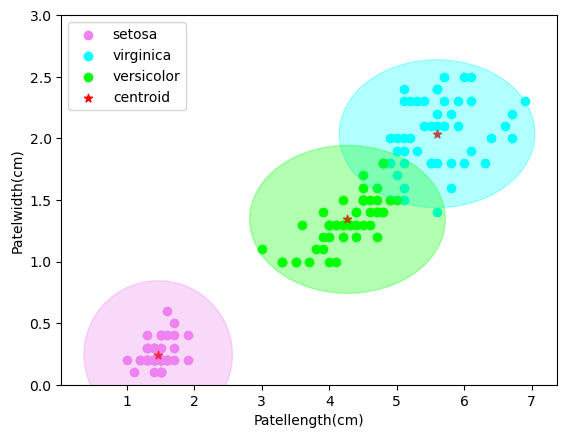

In [54]:
df_0=df_iris[df_iris["cluster"]==0]
df_1=df_iris[df_iris["cluster"]==1]
df_2=df_iris[df_iris["cluster"]==2]
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(df_0.PetalLengthCm,df_0.PetalWidthCm,color="violet",label="setosa")
ax.scatter(df_1.PetalLengthCm,df_1.PetalWidthCm,color="aqua",label="virginica")
ax.scatter(df_2.PetalLengthCm,df_2.PetalWidthCm,color="lime",label="versicolor")
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker="*",label="centroid")

ellipse1=patches.Ellipse((km.cluster_centers_[0][0],km.cluster_centers_[0][1]),width=2.2,height=1.2,color="violet",alpha=0.3)
ellipse2=patches.Ellipse((km.cluster_centers_[1][0],km.cluster_centers_[1][1]),width=2.9,height=1.2,color="aqua",alpha=0.3)
ellipse3=patches.Ellipse((km.cluster_centers_[2][0],km.cluster_centers_[2][1]),width=2.9,height=1.2,color="lime",alpha=0.3)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(ellipse3)

plt.legend()
plt.ylim(0.0,3)
plt.xlabel("Patellength(cm)")
plt.ylabel("Patelwidth(cm)")
plt.show()

### considered petals length and sepals length

In [55]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_predict(df_iris[["PetalLengthCm","SepalLengthCm"]])
    sse.append(km.inertia_)
sse

[566.0320666666668,
 112.96262731481481,
 53.80135119312654,
 34.31442077922078,
 25.631464509564513,
 21.923112128612132,
 18.286029782223284,
 14.984261904761908,
 13.361702030022812]

###  Used an Elbow Technique to find the optimum number of clusters

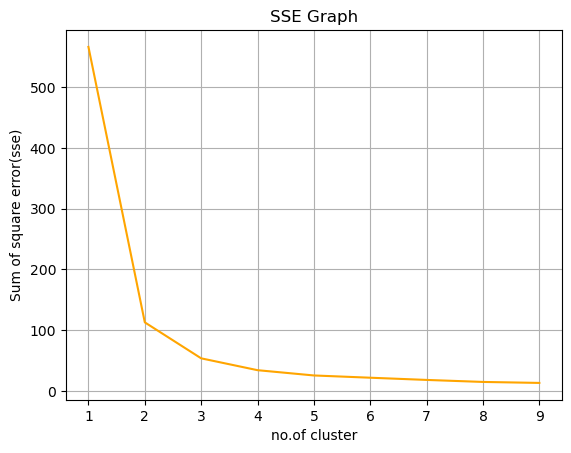

In [56]:
plt.title("SSE Graph")
plt.xlabel("no.of cluster")
plt.ylabel("Sum of square error(sse)")
plt.plot(k_range,sse,"orange")
plt.grid()

### Applying elbow technique on above chart we get the optimum number of cluster as 3.

## fit and predict

In [64]:
km=KMeans(n_clusters=3)
k_number=km.fit_predict(df_iris[["PetalLengthCm","SepalLengthCm"]])
k_number

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [65]:
km.cluster_centers_

array([[4.39310345, 5.87413793],
       [1.49411765, 5.00784314],
       [5.67804878, 6.83902439]])

In [66]:
df_iris["cluster1"]=k_number
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,cluster1
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1,2


### Visually displaying k-means model result on an interactive scatter plot 

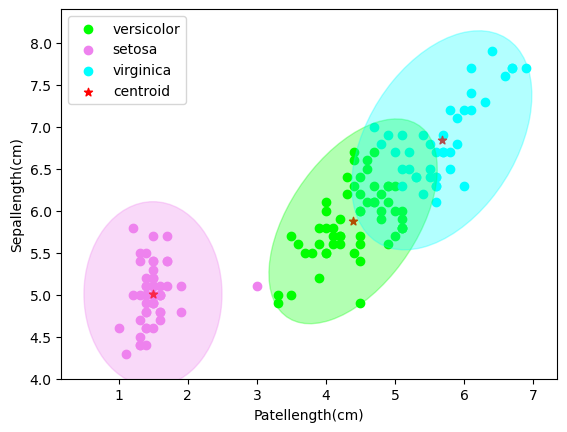

In [69]:
df_0=df_iris[df_iris["cluster1"]==0]
df_1=df_iris[df_iris["cluster1"]==1]
df_2=df_iris[df_iris["cluster1"]==2]
fig=plt.figure()
ax=fig.add_subplot()

plt.scatter(df_0.PetalLengthCm,df_0.SepalLengthCm,color="lime",label="versicolor")
plt.scatter(df_1.PetalLengthCm,df_1.SepalLengthCm,color="violet",label="setosa")
plt.scatter(df_2.PetalLengthCm,df_2.SepalLengthCm,color="aqua",label="virginica")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker="*",label="centroid")

ellipse1=patches.Ellipse((km.cluster_centers_[0][0],km.cluster_centers_[0][1]),width=3,height=1.7,color="lime",alpha=0.3,angle=45)
ellipse2=patches.Ellipse((km.cluster_centers_[1][0],km.cluster_centers_[1][1]),width=2,height=2.2,color="violet",alpha=0.3)
ellipse3=patches.Ellipse((km.cluster_centers_[2][0],km.cluster_centers_[2][1]),width=3.1,height=2,color="aqua",alpha=0.3,angle=45)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.add_patch(ellipse3)

plt.legend()
plt.ylim(4)
plt.xlabel("Patellength(cm)")
plt.ylabel("Sepallength(cm)")
plt.show()